In [61]:
import mne
import PyQt5
import matplotlib.pyplot as plt
plt.switch_backend("Qt5Agg")

In [160]:
raw_fname = 'Lutfullin/HighConc/170928_0005_EEG.edf'
raw = mne.io.read_raw_edf(raw_fname, preload=True)
raw.filter(1, 45, n_jobs=1, l_trans_bandwidth="auto", h_trans_bandwidth="auto",
           filter_length='auto', phase='zero-double')

Extracting edf Parameters from Lutfullin/HighConc/170928_0005_EEG.edf...
Setting channel info structure...
Creating Raw.info structure...
Reading 0 ... 114999  =      0.000 ...   459.996 secs...
Ready.
Setting up band-pass filter from 1 - 45 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 11.2 Hz
Filter length of 1650 samples (6.600 sec) selected
<RawEDF  |  170928_0005_EEG.edf, n_channels x n_times : 20 x 115000 (460.0 sec), ~17.6 MB, data loaded>


In [3]:
raw.info

<Info | 16 non-empty fields
    bads : 'list | 0 items
    buffer_size_sec : 'float | 1.0
    ch_names : 'list | EEG Fp1-Cz, EEG Fp2-Cz, EEG F7-Cz, EEG F3-Cz, EEG Fz-Cz, ...
    chs : 'list | 20 items (EEG: 19, MISC: 1)
    comps : 'list | 0 items
    custom_ref_applied : 'bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : 'list | 0 items
    highpass : 'float | 1.0 Hz
    hpi_meas : 'list | 0 items
    hpi_results : 'list | 0 items
    lowpass : 'float | 45.0 Hz
    meas_date : 'int | 1506599505
    nchan : 'int | 20
    projs : 'list | 0 items
    sfreq : 'float | 250.0 Hz
    acq_pars : 'NoneType
    acq_stim : 'NoneType
    ctf_head_t : 'NoneType
    description : 'NoneType
    dev_ctf_t : 'NoneType
    dig : 'NoneType
    experimenter : 'NoneType
    file_id : 'NoneType
    hpi_subsystem : 'NoneType
    kit_system_id : 'NoneType
    line_freq : 'NoneType
    meas_id : 'NoneType
    proj_id : 'NoneType
    proj_name : 'NoneType
    subject_info : 'NoneTy

In [4]:
raw.ch_names

['EEG Fp1-Cz',
 'EEG Fp2-Cz',
 'EEG F7-Cz',
 'EEG F3-Cz',
 'EEG Fz-Cz',
 'EEG F4-Cz',
 'EEG F8-Cz',
 'EEG T3-Cz',
 'EEG C3-Cz',
 'EEG C4-Cz',
 'EEG T4-Cz',
 'EEG T5-Cz',
 'EEG P3-Cz',
 'EEG Pz-Cz',
 'EEG P4-Cz',
 'EEG T6-Cz',
 'EEG O1-Cz',
 'EEG O2-Cz',
 'event',
 'STI 014']

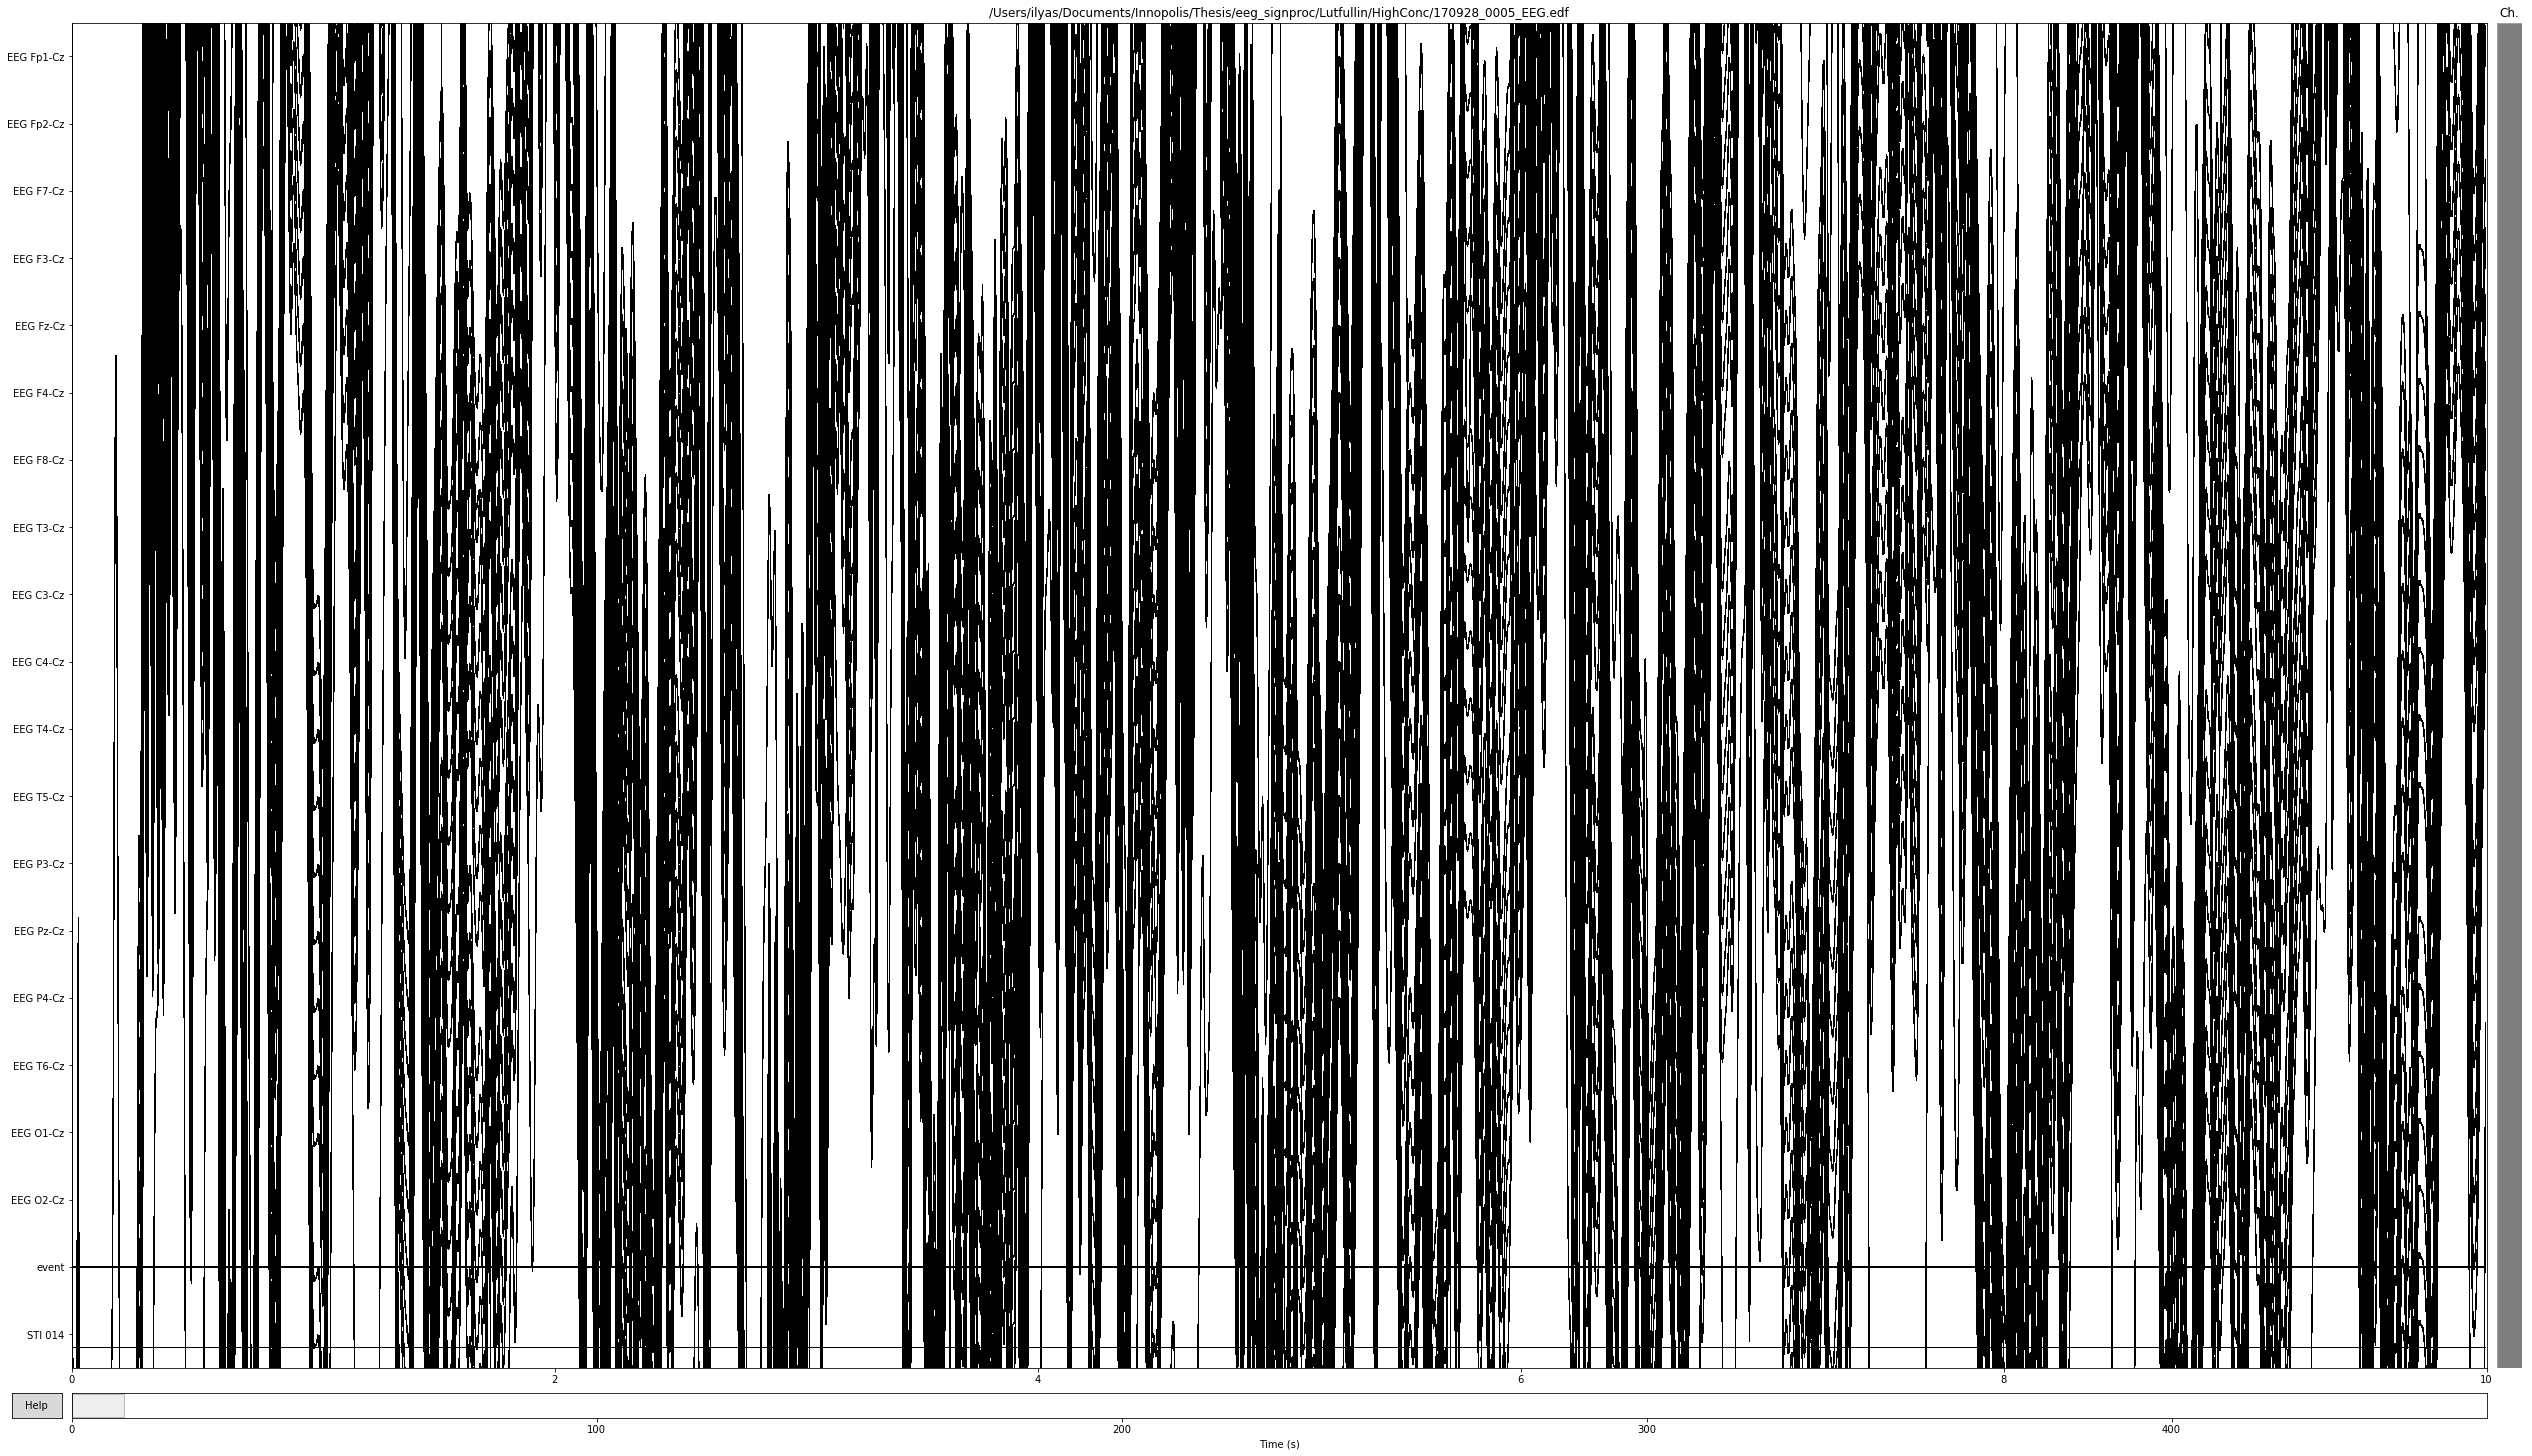

In [62]:
raw.plot(block=True)

In [7]:
import numpy as np
from mne.preprocessing import ICA
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne.datasets import sample

In [43]:
exclude_ch = ['event','STI 014']
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False,
                       stim=False, exclude=exclude_ch)
ica = ICA(n_components=1, method='fastica')
S = ica.fit(raw,picks=picks)

Fitting ICA to data using 18 channels. 
Please be patient, this may take some time
Inferring max_pca_components from picks.
Selection by number: 1 components


/Users/ilyas/anaconda/envs/Thesis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function fast_dot is deprecated; sklearn.utils.extmath.fast_dot was deprecated in version 0.19 and will be removed in 0.21. Use the equivalent np.dot instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ilyas/anaconda/envs/Thesis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function fast_dot is deprecated; sklearn.utils.extmath.fast_dot was deprecated in version 0.19 and will be removed in 0.21. Use the equivalent np.dot instead.
  warnings.warn(msg, category=DeprecationWarning)


In [44]:
S.info

<Info | 16 non-empty fields
    bads : 'list | 0 items
    buffer_size_sec : 'float | 1.0
    ch_names : 'list | EEG Fp1-Cz, EEG Fp2-Cz, EEG F7-Cz, EEG F3-Cz, EEG Fz-Cz, ...
    chs : 'list | 18 items (EEG: 18)
    comps : 'list | 0 items
    custom_ref_applied : 'bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : 'list | 0 items
    highpass : 'float | 1.0 Hz
    hpi_meas : 'list | 0 items
    hpi_results : 'list | 0 items
    lowpass : 'float | 45.0 Hz
    meas_date : 'int | 1506599505
    nchan : 'int | 18
    projs : 'list | 0 items
    sfreq : 'float | 250.0 Hz
    acq_pars : 'NoneType
    acq_stim : 'NoneType
    ctf_head_t : 'NoneType
    description : 'NoneType
    dev_ctf_t : 'NoneType
    dig : 'NoneType
    experimenter : 'NoneType
    file_id : 'NoneType
    hpi_subsystem : 'NoneType
    kit_system_id : 'NoneType
    line_freq : 'NoneType
    meas_id : 'NoneType
    proj_id : 'NoneType
    proj_name : 'NoneType
    subject_info : 'NoneType
    xp

In [45]:
n = ica.get_sources(raw)

/Users/ilyas/anaconda/envs/Thesis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function fast_dot is deprecated; sklearn.utils.extmath.fast_dot was deprecated in version 0.19 and will be removed in 0.21. Use the equivalent np.dot instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ilyas/anaconda/envs/Thesis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function fast_dot is deprecated; sklearn.utils.extmath.fast_dot was deprecated in version 0.19 and will be removed in 0.21. Use the equivalent np.dot instead.
  warnings.warn(msg, category=DeprecationWarning)


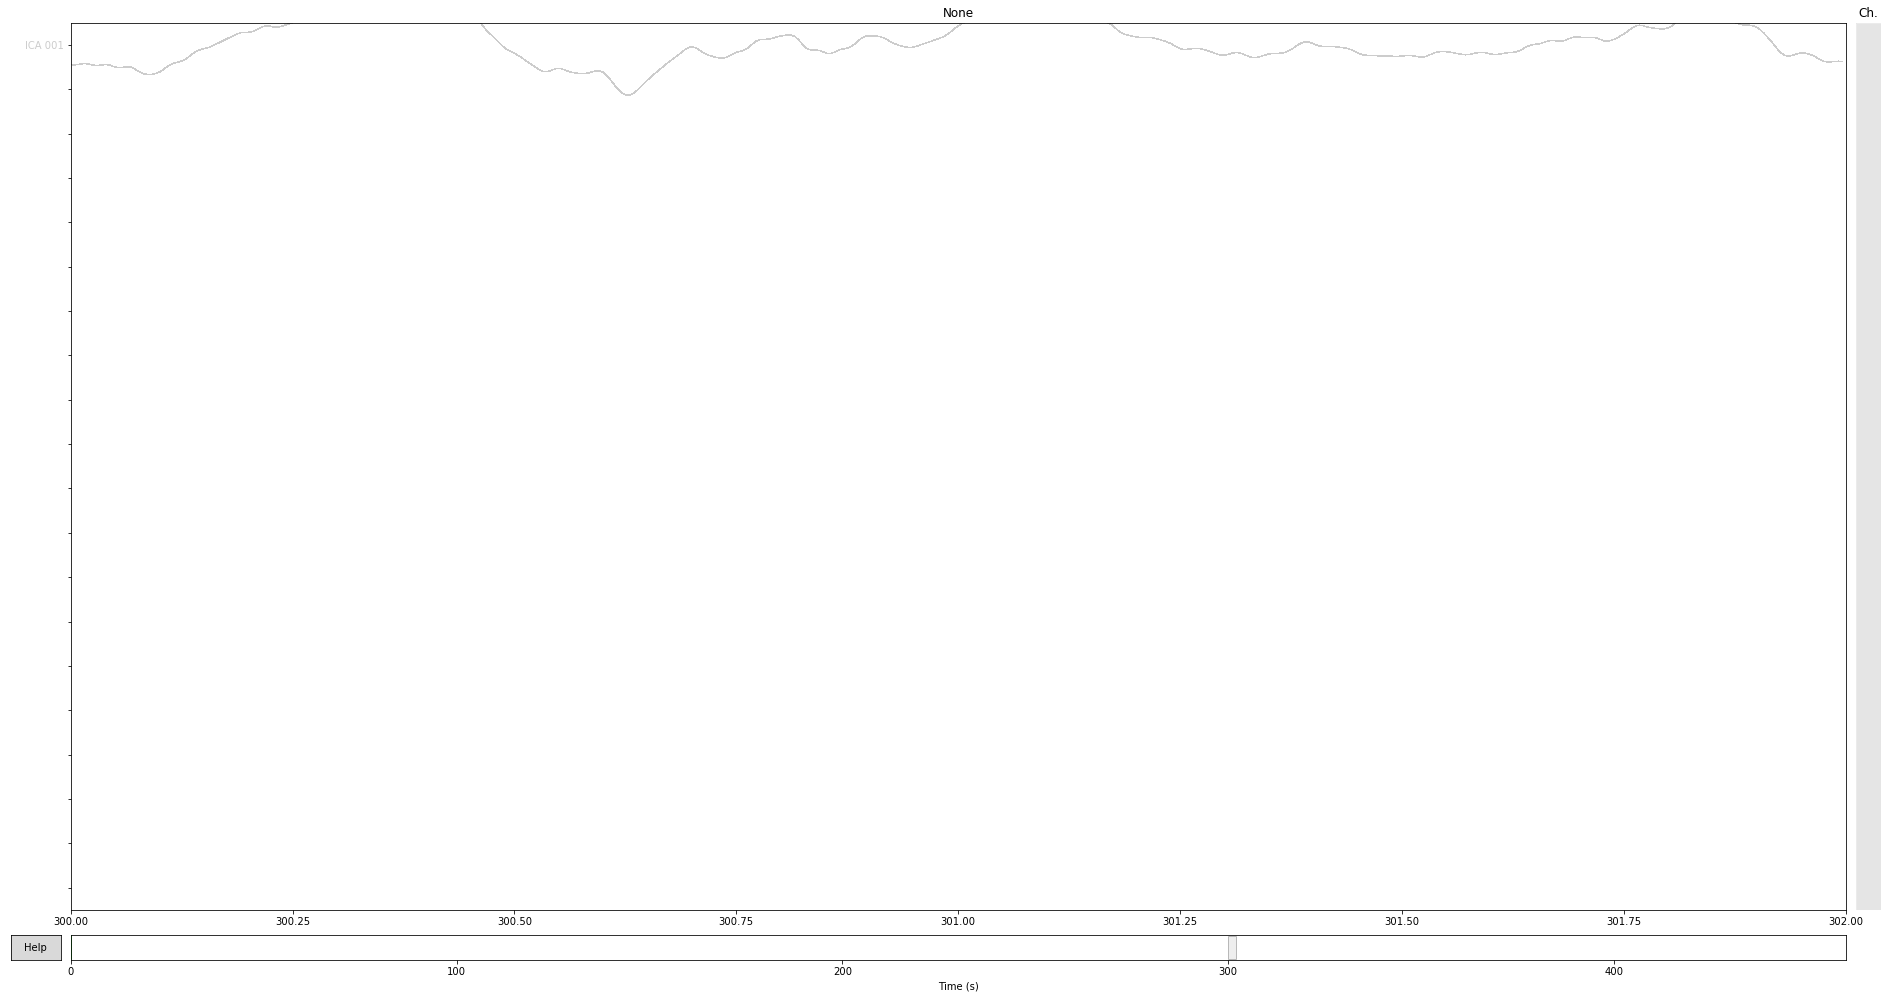

In [46]:
n.plot(block=True,remove_dc=False)

In [25]:
clean = ica.detect_artifacts(raw)

    Searching for artifacts...
    found 1 artifact by skewness
    found 1 artifact by kurtosis
    found 1 artifact by variance
Artifact indices found:
    1, 1, 2
    Removing duplicate indices...
Ready.


/Users/ilyas/anaconda/envs/Thesis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function fast_dot is deprecated; sklearn.utils.extmath.fast_dot was deprecated in version 0.19 and will be removed in 0.21. Use the equivalent np.dot instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ilyas/anaconda/envs/Thesis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function fast_dot is deprecated; sklearn.utils.extmath.fast_dot was deprecated in version 0.19 and will be removed in 0.21. Use the equivalent np.dot instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ilyas/anaconda/envs/Thesis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function fast_dot is deprecated; sklearn.utils.extmath.fast_dot was deprecated in version 0.19 and will be removed in 0.21. Use the equivalent np.dot instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ilyas/anaconda/envs/T

Transforming to ICA space (3 components)
Zeroing out 2 ICA components


/Users/ilyas/anaconda/envs/Thesis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function fast_dot is deprecated; sklearn.utils.extmath.fast_dot was deprecated in version 0.19 and will be removed in 0.21. Use the equivalent np.dot instead.
  warnings.warn(msg, category=DeprecationWarning)


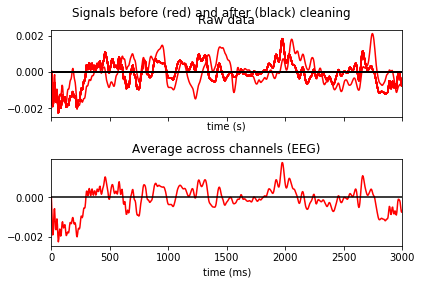

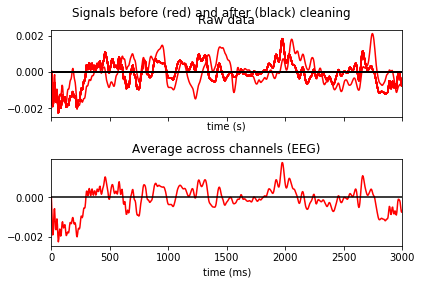

In [60]:
clean.plot_overlay(raw)

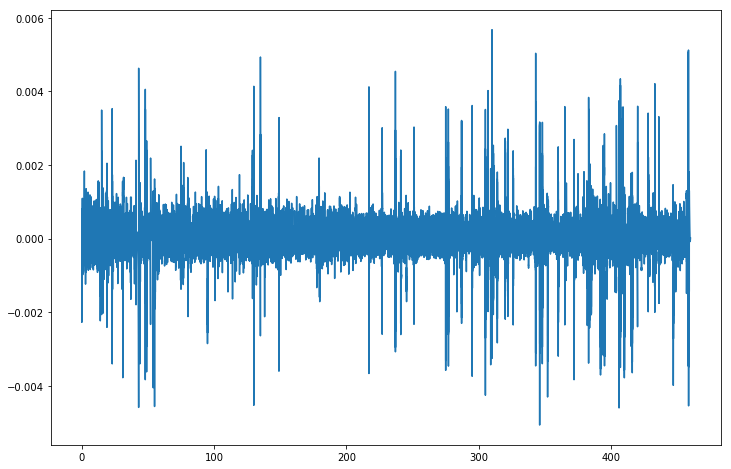

In [161]:
from mne.time_frequency import stft
sfreq = raw.info['sfreq']
data, times = raw[:1, int(sfreq * 0):]
plt.plot(times, data.T)

In [224]:
fft = stft(data,wsize=248)

Number of frequencies: 125
Number of time steps: 928


In [225]:
fft.shape

(1, 125, 928)

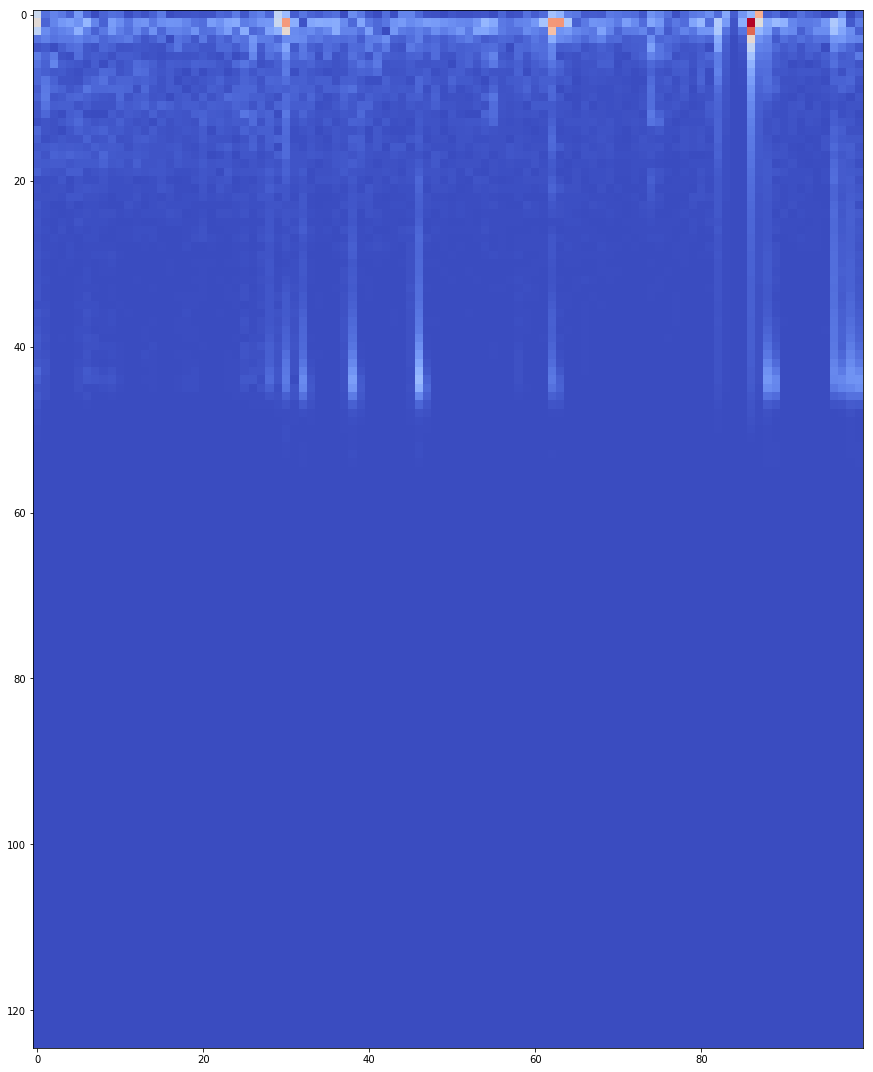

In [226]:
nfft = fft[0,:,0]
fft = np.absolute(fft)
f1 = plt.figure(figsize=(10,500))
for_plt = fft.reshape(fft.shape[1],fft.shape[2])
for_plt = for_plt[:,:]
plt.imshow(for_plt[:,:100],cmap="coolwarm")

In [168]:
fft

array([[[  5.17460822e-03,   1.12533345e-03,   1.38133287e-03, ...,
           3.25677539e-03,   2.30243595e-03,   1.75724972e-04],
        [  6.08122415e-03,   6.72711044e-04,   1.64579893e-03, ...,
           5.51429451e-03,   2.18064018e-03,   1.66837896e-04],
        [  4.90408487e-03,   1.65755672e-03,   1.28581900e-03, ...,
           2.60476103e-03,   8.84449276e-04,   1.31263387e-04],
        ..., 
        [  1.03615511e-05,   5.34223236e-09,   1.21671371e-08, ...,
           4.58352324e-08,   6.02802066e-08,   5.85768134e-07],
        [  1.03473102e-05,   5.27963039e-09,   1.20753378e-08, ...,
           4.55499463e-08,   5.73204256e-08,   5.87625209e-07],
        [  1.03341622e-05,   5.25859217e-09,   1.20446079e-08, ...,
           4.54548454e-08,   5.62778851e-08,   5.85750803e-07]]])

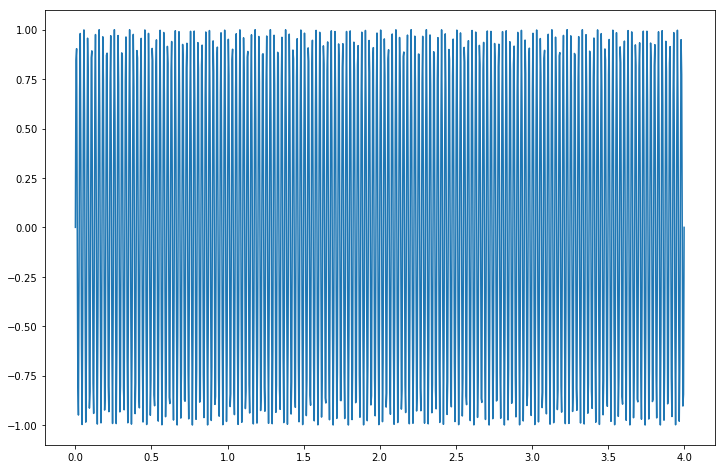

In [204]:
x = np.linspace(0,4,1000)
sin_f = np.sin(40*2*np.pi*x)
plt.plot(x,sin_f)

In [227]:
fft2 = stft(sin_f,wsize=248)

Number of frequencies: 125
Number of time steps: 9


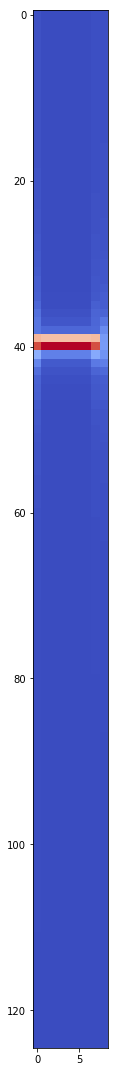

In [228]:
nfft = fft2[0,:,0]
fft2 = np.absolute(fft2)
f1 = plt.figure(figsize=(10,500))
for_plt = fft2.reshape(fft2.shape[1],fft2.shape[2])
for_plt = for_plt[:,:]
plt.imshow(for_plt[:,:100],cmap="coolwarm")

In [218]:
fft2.shape

(1, 129, 8)